<a href="https://colab.research.google.com/github/dan2380/StockPrediction/blob/main/AppleStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#dataset from https://finance.yahoo.com/quote/AAPL/history?period1=345427200&period2=1676592000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
#adjusted time period to : max

In [2]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
...,...,...,...,...,...,...,...
10630,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
10631,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
10632,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
10633,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300


In [48]:
#We will discard all info except for date and closing data
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10630,2023-02-10,151.009995
10631,2023-02-13,153.850006
10632,2023-02-14,153.199997
10633,2023-02-15,155.330002


In [49]:
#import datetime
import datetime


In [50]:
#convert datetime str obj to datetime obj
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

<ipython-input-50-5dac19f8797f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10630   2023-02-10
10631   2023-02-13
10632   2023-02-14
10633   2023-02-15
10634   2023-02-16
Name: Date, Length: 10635, dtype: datetime64[ns]

In [51]:
#we see at the bottom that dtype is now changed to a datetime object, which is good
#we will now remove the default index, and make the Date the index instead
df.index = df.pop('Date')
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-02-10,151.009995
2023-02-13,153.850006
2023-02-14,153.199997


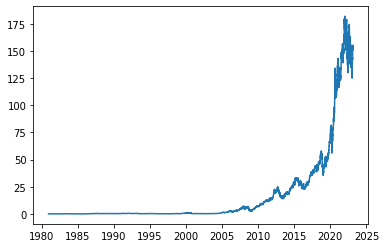

In [52]:
#plot out life time graph of Apple's closing stock price
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [60]:
#supervised learning
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str)
  last_date  = pd.to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1980-12-17', 
                                '2022-02-16', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1980-12-17,0.128348,0.121652,0.112723,0.115513
1,1980-12-18,0.121652,0.112723,0.115513,0.118862
2,1980-12-19,0.112723,0.115513,0.118862,0.126116
3,1980-12-22,0.115513,0.118862,0.126116,0.132254
4,1980-12-23,0.118862,0.126116,0.132254,0.137835
...,...,...,...,...,...
10376,2022-02-10,171.660004,174.830002,176.279999,172.119995
10377,2022-02-11,174.830002,176.279999,172.119995,168.639999
10378,2022-02-14,176.279999,172.119995,168.639999,168.880005
10379,2022-02-15,172.119995,168.639999,168.880005,172.789993


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

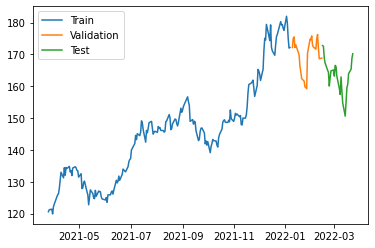

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 194ms/step - loss: 21342.5840 - mean_absolute_error: 145.3028 - val_loss: 28823.0566 - val_mean_absolute_error: 169.6865
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 21258.9512 - mean_absolute_error: 145.0155 - val_loss: 28749.8945 - val_mean_absolute_error: 169.4708
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 21203.3027 - mean_absolute_error: 144.8225 - val_loss: 28676.2617 - val_mean_absolute_error: 169.2534
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 21123.0156 - mean_absolute_error: 144.5461 - val_loss: 28558.9082 - val_mean_absolute_error: 168.9063
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 21013.8750 - mean_absolute_error: 144.1681 - val_loss: 28407.4141 - val_mean_absolute_error: 168.4573
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 20873.8750 - mean_absolute_error: 143.6816 - val_loss: 28224.

7/7 [==============================] - 1s 3ms/step


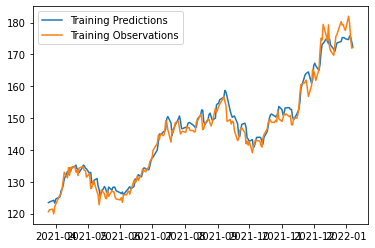

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


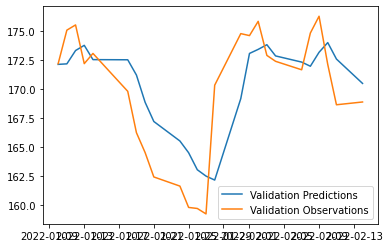

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 20ms/step


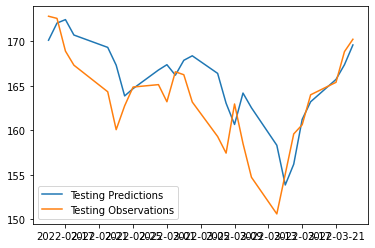

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


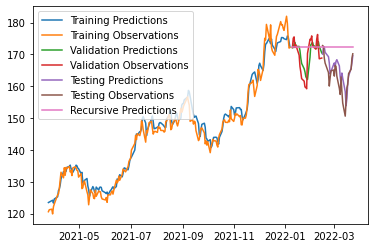

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])